# Assignment 3: Clustering

Szymon Siemieniuk 151947

Nikita Makarevich 153989

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler, Normalizer, StandardScaler

from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.utils.random import sample_without_replacement
from sklearn.model_selection import GridSearchCV


df_data = pd.read_csv('data/data.csv')

In [30]:
df_data.head()

,id,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,...,f_19,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_27,f_28
0,0,-0.389420,-0.912791,0.648951,0.589045,-0.830817,0.733624,2.258560,2,13,...,-0.478412,-0.757002,-0.763635,-1.090369,1.142641,-0.884274,1.137896,1.309073,1.463002,0.813527
1,1,-0.689249,-0.453954,0.654175,0.995248,-1.653020,0.863810,-0.090651,2,3,...,-0.428791,-0.089908,-1.784204,-0.839474,0.459685,1.759412,-0.275422,-0.852168,0.562457,-2.680541
2,2,0.809079,0.324568,-1.170602,-0.624491,0.105448,0.783948,1.988301,5,11,...,-0.413534,-1.602377,1.190984,3.267116,-0.088322,-2.168635,-0.974989,1.335763,-1.110655,-3.630723
3,3,-0.500923,0.229049,0.264109,0.231520,0.415012,-1.221269,0.138850,6,2,...,0.619283,1.287801,0.532837,1.036631,-2.041828,1.440490,-1.900191,-0.630771,-0.050641,0.238333
4,4,-0.671268,-1.039533,-0.270155,-1.830264,-0.290108,-1.852809,0.781898,8,7,...,-1.628830,-0.434948,0.322505,0.284326,-2.438365,1.473930,-1.044684,1.602686,-0.405263,-1.987263


In [31]:
cat_features = [
    'f_07',
    'f_08',
    'f_09',
    'f_10',
    'f_11',
    'f_12',
    'f_13'
]
df_cat = df_data[cat_features]

num_features = list(set(df_data.columns) - set(cat_features) - set('id'))
df_num = df_data[num_features]

columns = num_features
columns.extend(cat_features)

df_data = df_data[columns]

In [49]:
df_cat

,f_07,f_08,f_09,f_10,f_11,f_12,f_13
0,2,13,14,5,13,6,6
1,2,3,6,4,6,16,9
2,5,11,5,8,9,3,11
3,6,2,13,8,9,6,4
4,8,7,5,3,1,13,11
...,...,...,...,...,...,...,...
97995,5,7,8,5,7,6,7
97996,3,9,2,5,3,11,12
97997,8,9,10,7,5,4,3
97998,1,8,11,11,3,9,5


In [62]:
np.sort(df_cat.iloc[:, 6].unique())

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 30])

In [36]:
scaler = MinMaxScaler().fit(df_num)
norm = MinMaxScaler().fit(df_cat)

df_scaled = pd.DataFrame(scaler.transform(df_num), columns=df_num.columns)

df_scaled[df_cat.columns] = norm.transform(df_cat)

df_scaled.drop(columns=['id'], inplace=True)

In [37]:
df_scaled.head()

,f_24,f_21,f_22,f_15,f_06,f_02,f_16,f_25,f_27,f_28,...,f_00,f_14,f_01,f_07,f_08,f_09,f_10,f_11,f_12,f_13
0,0.450930,0.428585,0.431881,0.555722,0.804339,0.562361,0.629554,0.546854,0.605064,0.557570,...,0.470880,0.440618,0.385799,0.06250,0.433333,0.318182,0.138889,0.464286,0.157895,0.200000
1,0.623499,0.309548,0.450616,0.469987,0.540179,0.562946,0.518967,0.446892,0.543135,0.306763,...,0.438371,0.560252,0.439604,0.06250,0.100000,0.136364,0.111111,0.214286,0.421053,0.300000
2,0.367093,0.656568,0.757268,0.568349,0.773949,0.358769,0.543429,0.397413,0.428078,0.238558,...,0.600831,0.416930,0.530897,0.15625,0.366667,0.113636,0.222222,0.321429,0.078947,0.366667
3,0.602681,0.579803,0.590711,0.586226,0.565985,0.519301,0.372635,0.331975,0.500973,0.516282,...,0.458790,0.449681,0.519696,0.18750,0.066667,0.295455,0.222222,0.321429,0.157895,0.133333
4,0.604864,0.555270,0.534534,0.445157,0.638294,0.459521,0.373856,0.392484,0.476586,0.356527,...,0.440320,0.479984,0.370937,0.25000,0.233333,0.113636,0.083333,0.035714,0.342105,0.366667


In [38]:
df_scaled.describe()

,f_24,f_21,f_22,f_15,f_06,f_02,f_16,f_25,f_27,f_28,...,f_00,f_14,f_01,f_07,f_08,f_09,f_10,f_11,f_12,f_13
count,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,...,98000.000000,98000.000000,98000.000000,98000.00000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000
mean,0.519516,0.517459,0.510408,0.514757,0.550030,0.489633,0.502128,0.461824,0.511227,0.482600,...,0.513236,0.493985,0.493491,0.17331,0.225435,0.186208,0.223830,0.288750,0.186221,0.209537
std,0.100721,0.116603,0.110356,0.113675,0.112158,0.112045,0.120300,0.111474,0.089771,0.109715,...,0.108731,0.112651,0.117351,0.11537,0.138412,0.134203,0.130562,0.149897,0.116666,0.137336
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.449683,0.438906,0.436914,0.438097,0.473861,0.414471,0.421016,0.386522,0.453121,0.408544,...,0.439891,0.417840,0.414154,0.09375,0.133333,0.090909,0.138889,0.178571,0.105263,0.100000
50%,0.519558,0.517749,0.509069,0.514568,0.550141,0.489713,0.502264,0.459355,0.510111,0.479699,...,0.513323,0.493999,0.493616,0.15625,0.200000,0.159091,0.194444,0.285714,0.157895,0.200000
75%,0.588121,0.596604,0.582760,0.591574,0.625499,0.565509,0.583126,0.536230,0.568088,0.554483,...,0.586539,0.570135,0.572312,0.25000,0.300000,0.250000,0.305556,0.392857,0.263158,0.300000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [39]:
RANDOM_STATE = 420
SAMPLE_SIZE = 10000

silhouette_scores = []
bouldin_scores = []
ns_clusters = list(range(2, 13, 1))

for n_clusters in ns_clusters:
    print(f"Computing for n_clusters: {n_clusters}")
    indices = sample_without_replacement(len(df_scaled), SAMPLE_SIZE, random_state=RANDOM_STATE)
    sampled_df_scaled = df_scaled.iloc[indices]

    kmeans = KMeans(n_clusters=n_clusters, random_state=RANDOM_STATE, n_init="auto", verbose=False)
    kmeans.fit(sampled_df_scaled)

    labels = kmeans.predict(sampled_df_scaled)
    silhouette_scores.append(silhouette_score(sampled_df_scaled, labels))
    bouldin_scores.append(davies_bouldin_score(sampled_df_scaled, labels))


Computing for n_clusters: 2
Computing for n_clusters: 3
Computing for n_clusters: 4
Computing for n_clusters: 5
Computing for n_clusters: 6
Computing for n_clusters: 7
Computing for n_clusters: 8
Computing for n_clusters: 9
Computing for n_clusters: 10
Computing for n_clusters: 11
Computing for n_clusters: 12


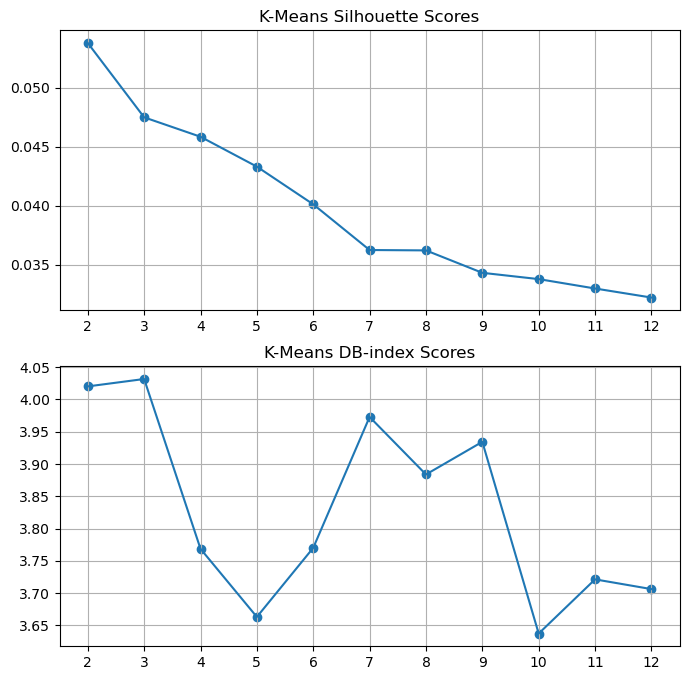

In [40]:
fig, axs = plt.subplots(2, 1, figsize=(8, 8))
axs[0].plot(ns_clusters, silhouette_scores)
axs[0].scatter(ns_clusters, silhouette_scores)
axs[0].set_title("K-Means Silhouette Scores")
axs[0].set_xticks(ns_clusters)
axs[0].grid()

axs[1].plot(ns_clusters, bouldin_scores)
axs[1].scatter(ns_clusters, bouldin_scores)
axs[1].set_title("K-Means DB-index Scores")
axs[1].set_xticks(ns_clusters)
axs[1].grid()

plt.show()

In [22]:
N_TRIALS = 10000
dists = []
for _ in range(N_TRIALS):
    inds = sample_without_replacement(len(df_scaled), 2)
    dist = np.linalg.norm(df_scaled.iloc[inds[0]] - df_scaled.iloc[inds[1]])
    dists.append(dist)

In [23]:
np.mean(dists)

6.5770110558073736

In [8]:
def dbscan_grid(epsilons, mins_samples, scorer=davies_bouldin_score):
    results = np.zeros(shape=(len(epsilons), len(mins_samples)))
    for i, eps in enumerate(epsilons):
        for j, min_samples in enumerate(mins_samples):
            model = DBSCAN(eps=eps, min_samples=min_samples)
            labels = model.fit_predict(df_scaled)
            results[i, j] = scorer(df_scaled, labels)
    return results

epsilons = np.linspace(0.45, 0.45667, 5)
mins_samples = np.arange(2, 8)
dbscan_bouldin_scores = []

results = dbscan_grid(epsilons, mins_samples, scorer=davies_bouldin_score)

ValueError: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)

<Axes: >

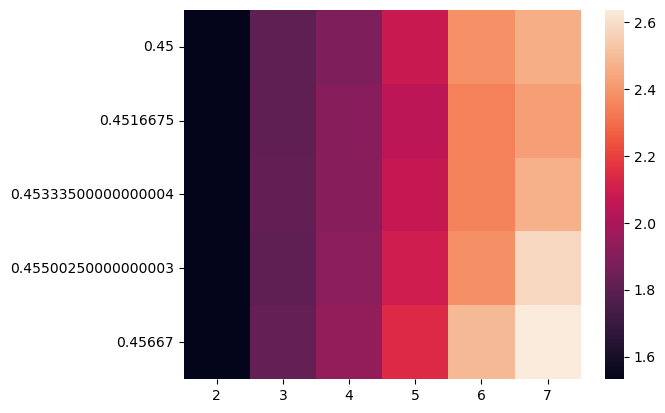

In [63]:
sns.heatmap(results, xticklabels=mins_samples, yticklabels=epsilons)

In [79]:
dbscan = DBSCAN(eps=0.485, min_samples=5)
labels = dbscan.fit_predict(df_scaled)

label_ids, label_counts = np.unique(labels, return_counts=True)
dbscan_results = pd.DataFrame()
dbscan_results["Label"] = label_ids
dbscan_results["Counts"] = label_counts

dbscan_results

,Label,Counts
0,-1,19357
1,0,78640
2,1,3


## Cluster visualization

In [184]:
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

def plot_clusters(X, y, n_components=2):
    pca = PCA(n_components=n_components)
    # lda = LinearDiscriminantAnalysis()
    # X_new = lda.fit_transform(X, y)
    X_new = pca.fit_transform(X, y)
    fig, ax = plt.subplots(1, 1, figsize=(10, 5))
    scatter = ax.scatter(x=X_new[:, 0], y=X_new[:, 1], c=y)
    ax.legend(*scatter.legend_elements(), title="Clusters")

def plot_cluster_distances_heatmap(X, labels_list, dist_metrics_list, model_names=None):
    m, n = len(labels_list), len(dist_metrics_list)
    fig, axs = plt.subplots(m, n, figsize=(3*n, 3*m))
    axs = np.reshape(axs, newshape=(len(labels_list), len(dist_metrics_list)))

    for plot_i, labels in enumerate(labels_list):
        for plot_j, dist_metric in enumerate(dist_metrics_list):
            unique_labels = np.unique(labels)
            n_clusters = len(unique_labels)

            dist_matrix = np.zeros(shape=(n_clusters, n_clusters))

            for i, label1 in enumerate(unique_labels):
                for j, label2 in enumerate(unique_labels):
                    if i > j:
                        dist_matrix[i, j] = dist_matrix[j, i]
                        continue

                    dist_matrix[i, j] = dist_metric(X[labels==label1], X[labels==label2])

            sns.heatmap(dist_matrix, xticklabels=unique_labels, yticklabels=unique_labels, ax=axs[plot_i, plot_j])

            
            if plot_i == 0:
                axs[plot_i, plot_j].set_title(dist_metric.__name__)
            if model_names is not None and plot_j == 0:
                axs[plot_i, plot_j].set_ylabel(model_names[plot_i])

In [181]:
from sklearn.utils.random import sample_without_replacement

def euclidean_distance_between_centroids(X1: pd.DataFrame, X2: pd.DataFrame):
    centroid1, centroid2 = X1.mean(axis=0), X2.mean(axis=0)
    result = np.linalg.norm(centroid1-centroid2)
    return result

def euclidean_distance_avg(X1: pd.DataFrame, X2: pd.DataFrame, sample_size=50):
    dists = np.zeros(shape=(sample_size, sample_size))
    
    X1_sample_inds = sample_without_replacement(len(X1), sample_size)
    X2_sample_inds = sample_without_replacement(len(X2), sample_size)
    for i, ind1 in enumerate(X1_sample_inds):
        for j, ind2 in enumerate(X2_sample_inds):
            dists[i, j] = np.linalg.norm(X1.iloc[ind1, :] - X2.iloc[ind2, :])

    return dists.mean()

def canberra_distance_avg(X1: pd.DataFrame, X2: pd.DataFrame, sample_size=50):
    dists = np.zeros(shape=(sample_size, sample_size))

    X1_sample_inds = sample_without_replacement(len(X1), sample_size)
    X2_sample_inds = sample_without_replacement(len(X2), sample_size)
    for i, ind1 in enumerate(X1_sample_inds):
        for j, ind2 in enumerate(X2_sample_inds):
            row1, row2 = X1.iloc[ind1, :], X2.iloc[ind2, :]
            dists[i, j] = np.sum(np.abs(row1 - row2) / (np.abs(row1) + np.abs(row2)))
    return dists.mean()

In [189]:
### TEMPORARY CELLS FOR TESTING

indices = sample_without_replacement(len(df_scaled), SAMPLE_SIZE, random_state=RANDOM_STATE)
sampled_df_scaled = df_scaled.iloc[indices]

kmeans = KMeans(n_clusters=5, random_state=RANDOM_STATE, n_init="auto", verbose=False)
kmeans.fit(sampled_df_scaled)

labels = kmeans.predict(df_scaled)
labels_kek = np.array([0]*49000 + [1]*49000)

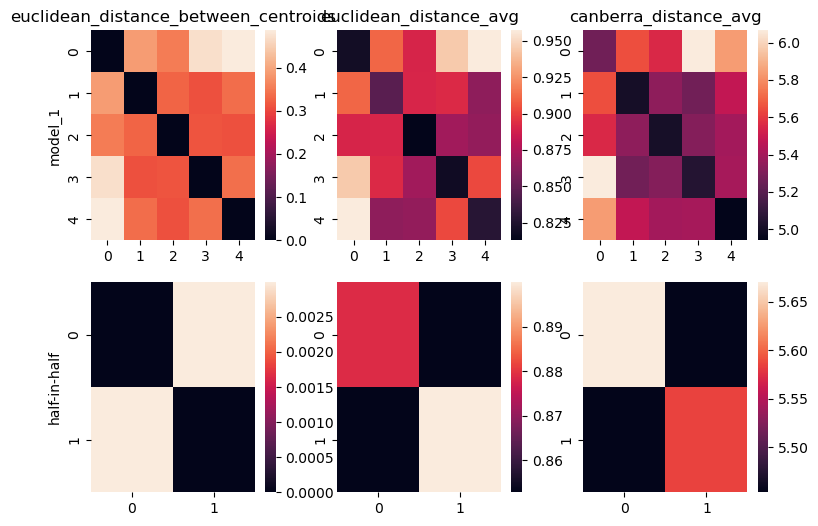

In [186]:
plot_cluster_distances_heatmap(
    df_scaled, 
    [labels, labels_kek], 
    [euclidean_distance_between_centroids, euclidean_distance_avg, canberra_distance_avg], 
    model_names=["model_1", "half-in-half"]
)

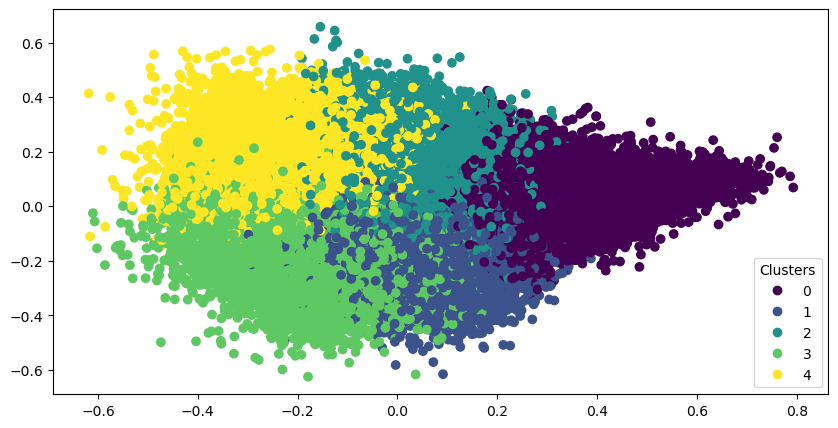

In [190]:
plot_clusters(df_scaled, labels)